In [1]:
from feature_extractors.HESIFT import *
# Show the figures / plots inside the notebook
%matplotlib inline

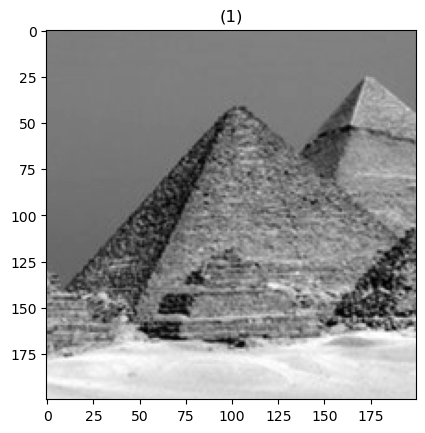

In [2]:
# Preparing the test image
pyramids = io.imread("images/pyramids.jpeg")
baseImage = (rgb2gray(pyramids) * 255).astype(np.int64)
baseImage = baseImage[500:700, 200:400]
show_images([baseImage])

In [3]:
num_octaves = computeNumberOfOctaves(baseImage.shape)
gaussian_kernels = generateGaussianKernels(0.7, 3)
encryptedBaseImage = encryptImage(baseImage)
encryptedGaussianImages = generateEncryptedGaussianImages(encryptedBaseImage, num_octaves, gaussian_kernels)
encryptedDOGImages = generateEncryptedDoGImages(encryptedGaussianImages)

Generating Gaussian Kernels...
Generating Gaussian images...
Octave 1 Running:
Octave 1 Done!!!
-----------------------------------------------------------------------
Octave 2 Running:
Octave 2 Done!!!
-----------------------------------------------------------------------
Octave 3 Running:
Octave 3 Done!!!
-----------------------------------------------------------------------
Octave 4 Running:
Octave 4 Done!!!
-----------------------------------------------------------------------
Octave 5 Running:
Octave 5 Done!!!
-----------------------------------------------------------------------
Octave 6 Running:
Octave 6 Done!!!
-----------------------------------------------------------------------
Octave 7 Running:
Octave 7 Done!!!
-----------------------------------------------------------------------
Generating Difference-of-Gaussian images...
Octave 1 Running:
Octave 1 Done!!!
-----------------------------------------------------------------------
Octave 1 Running:
Octave 1 Done!!!
----

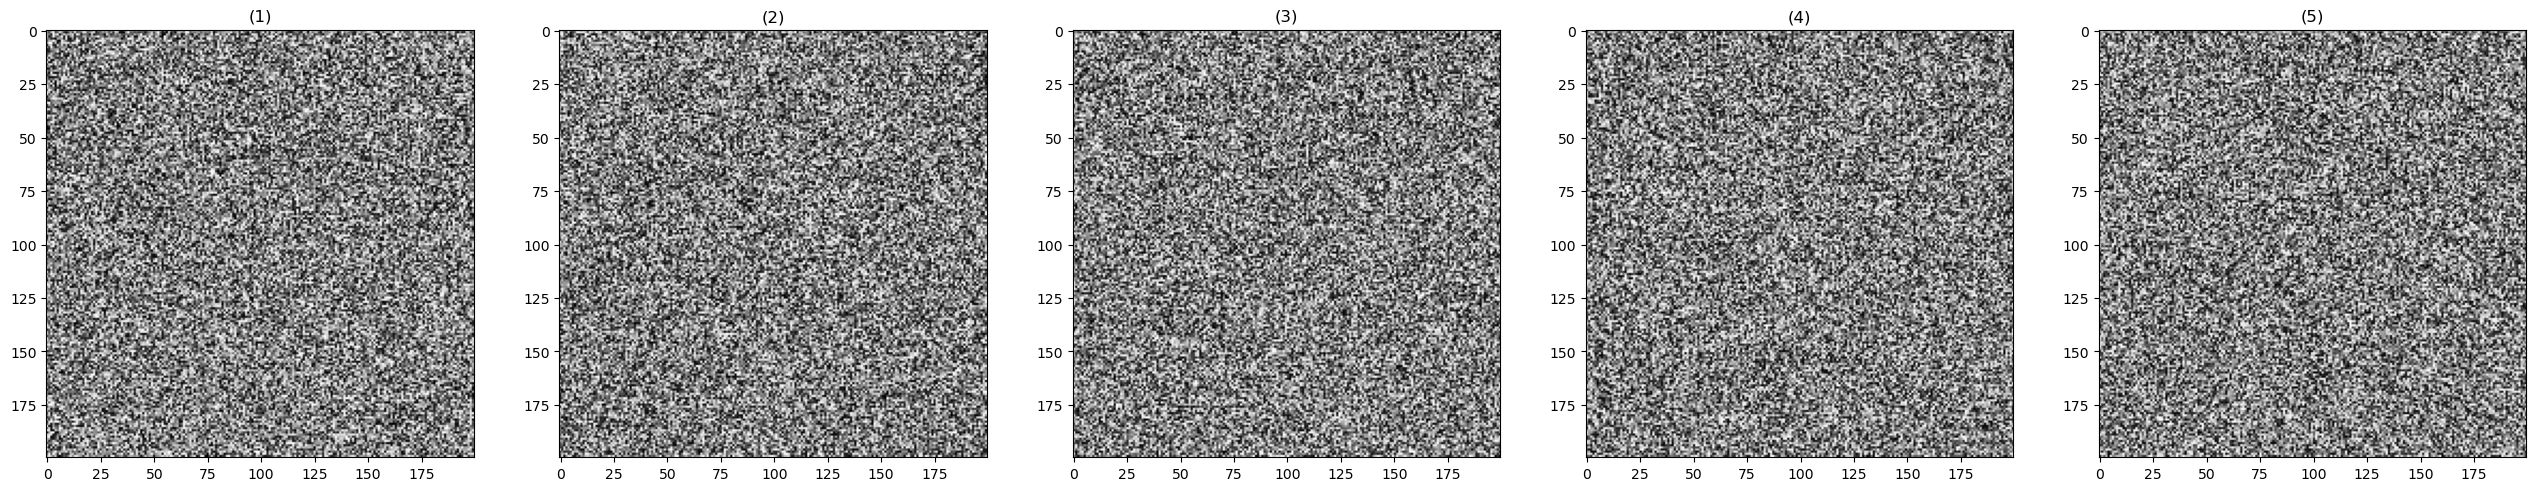

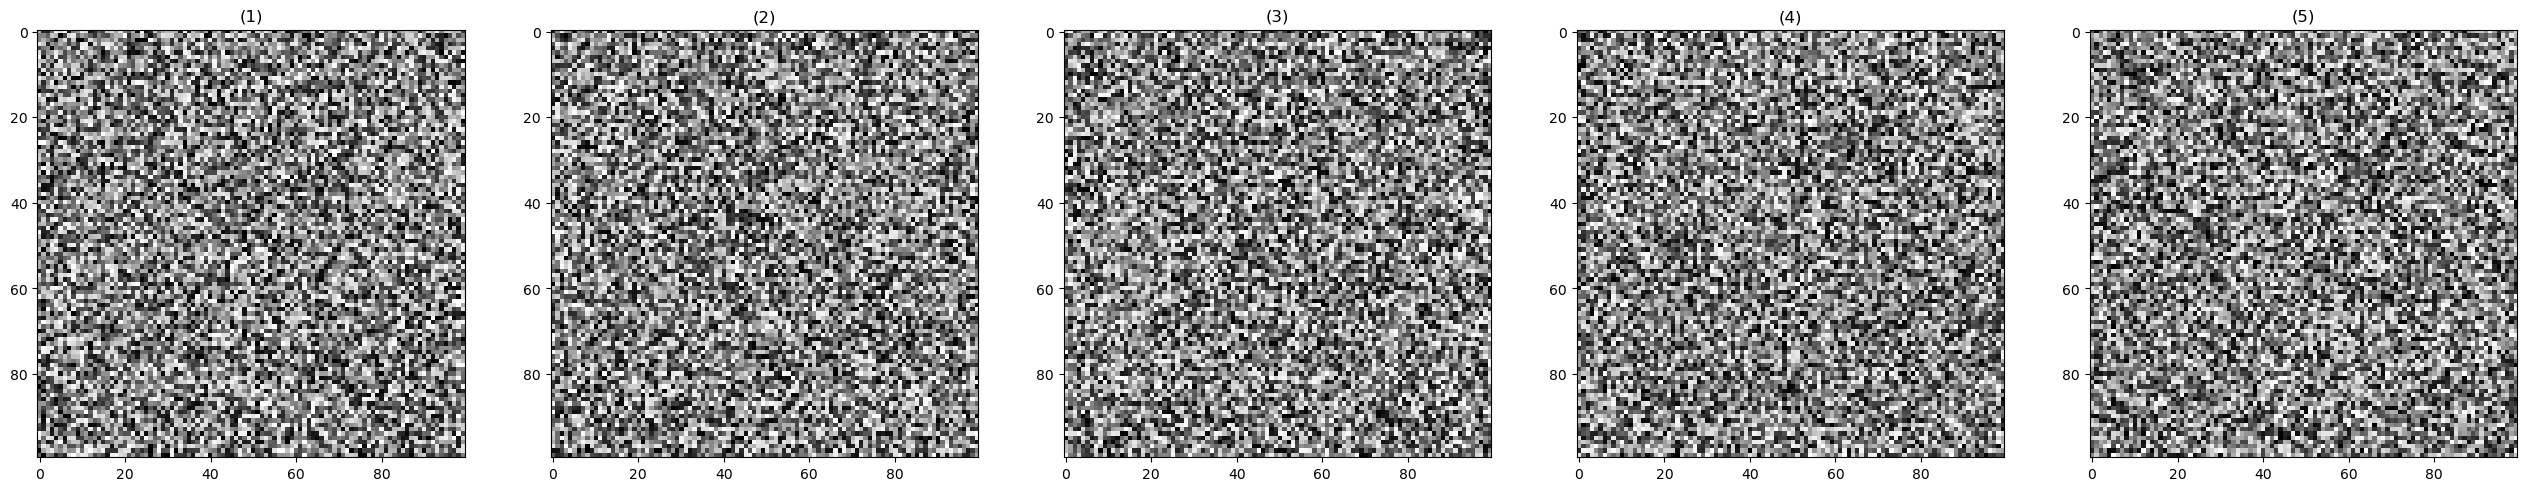

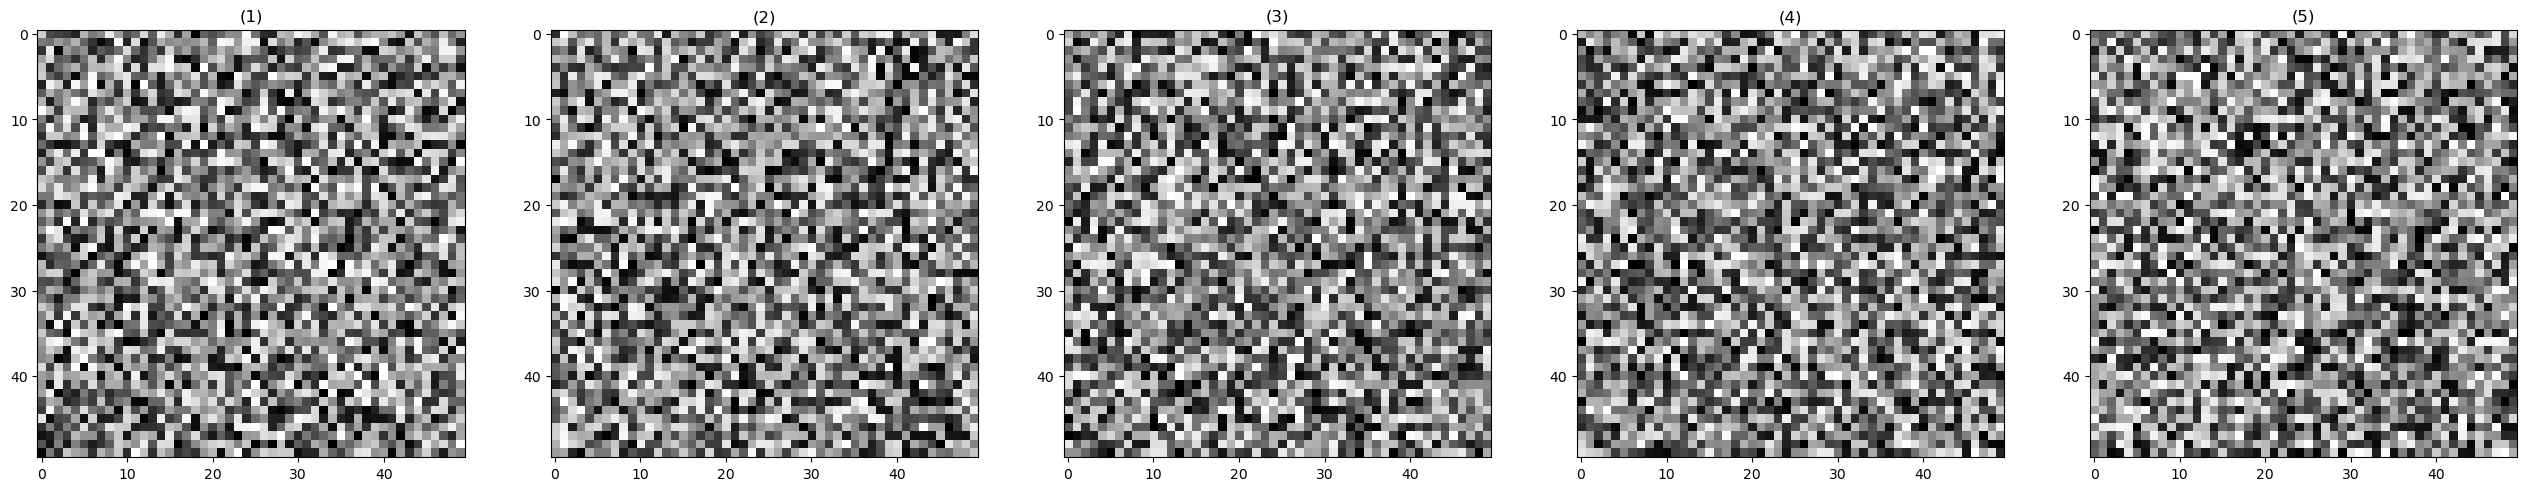

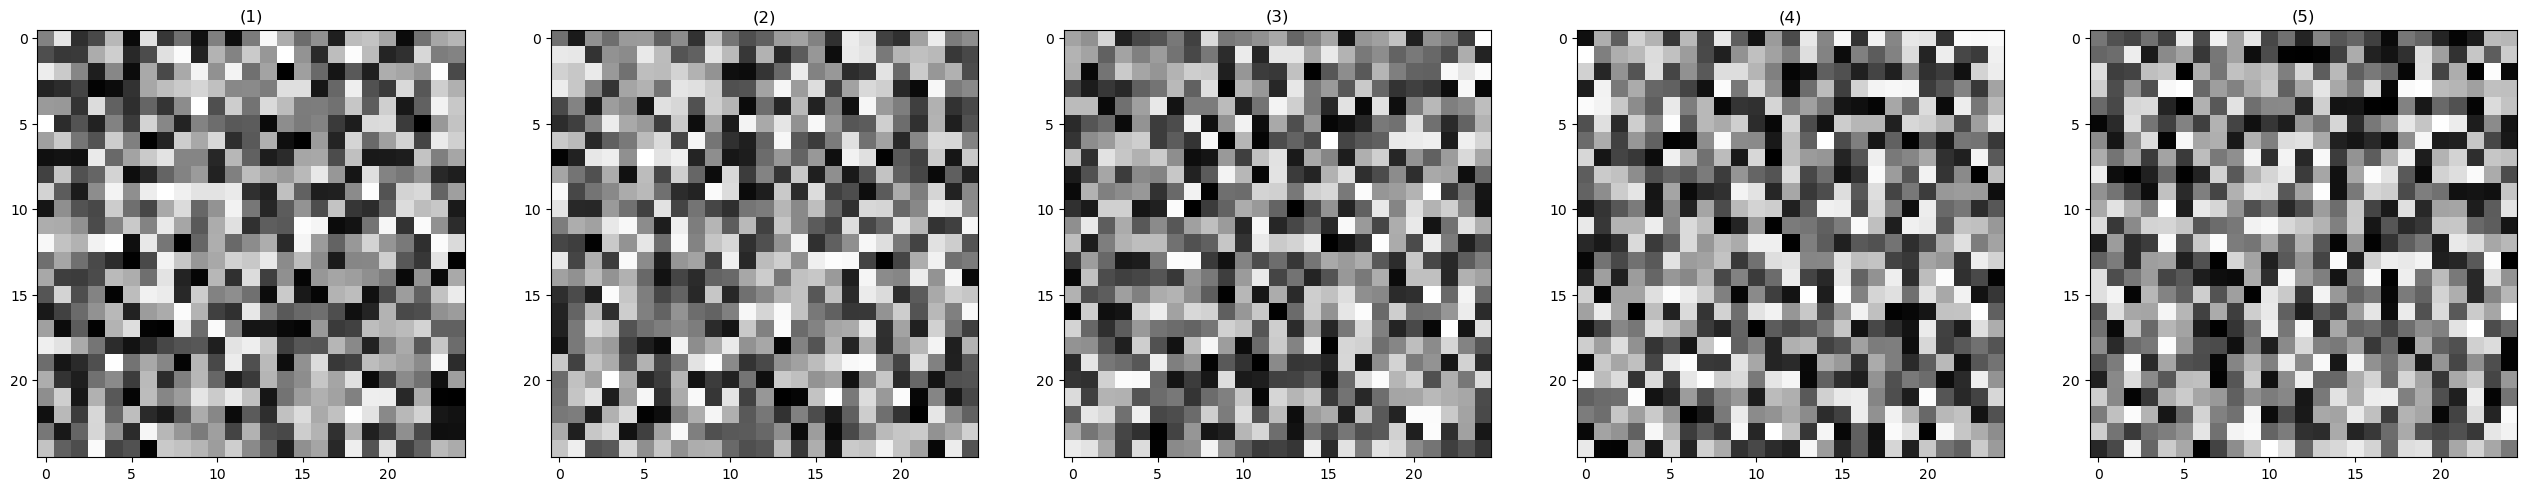

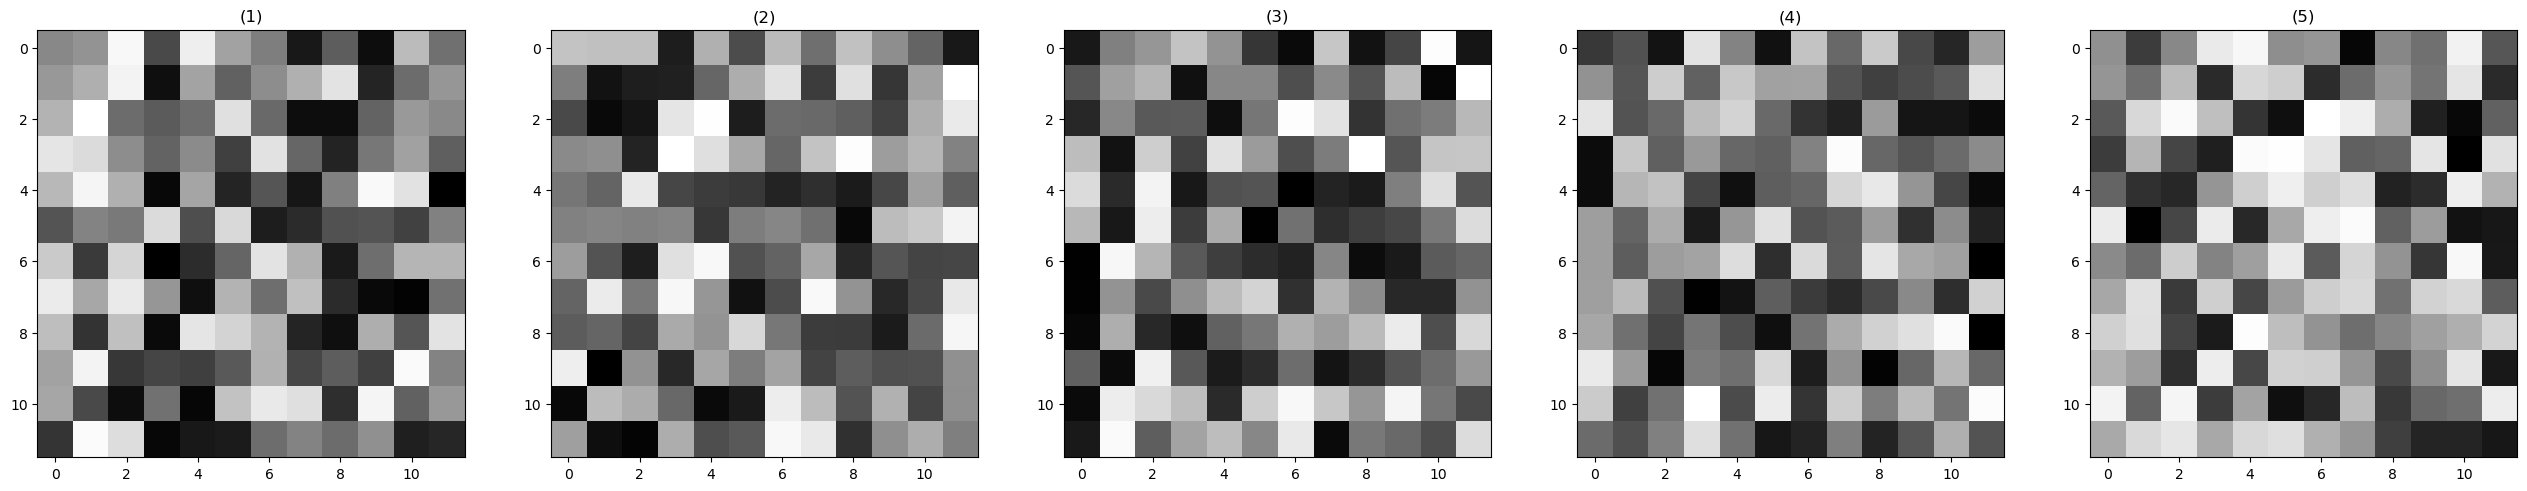

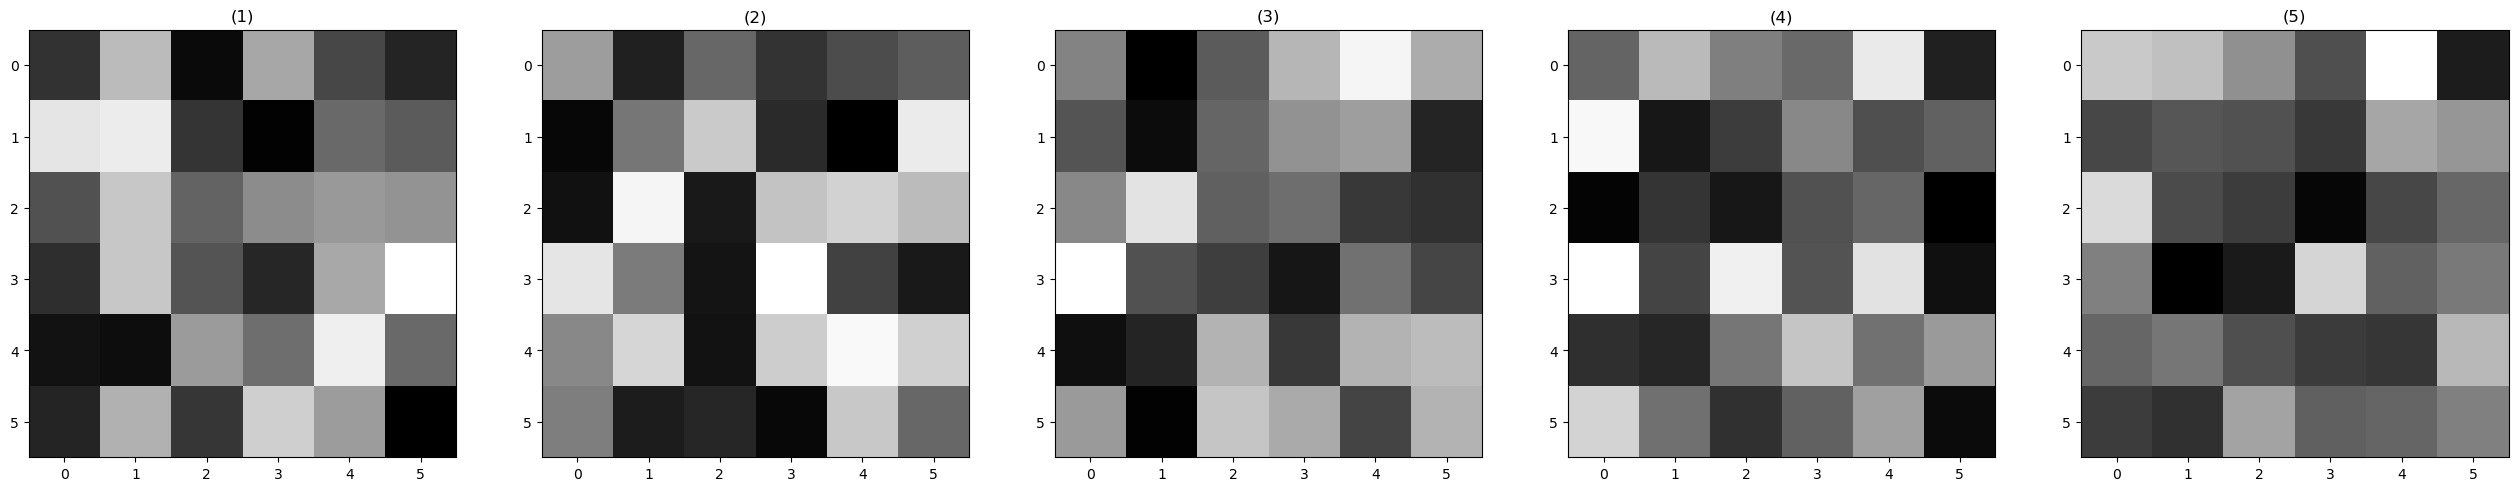

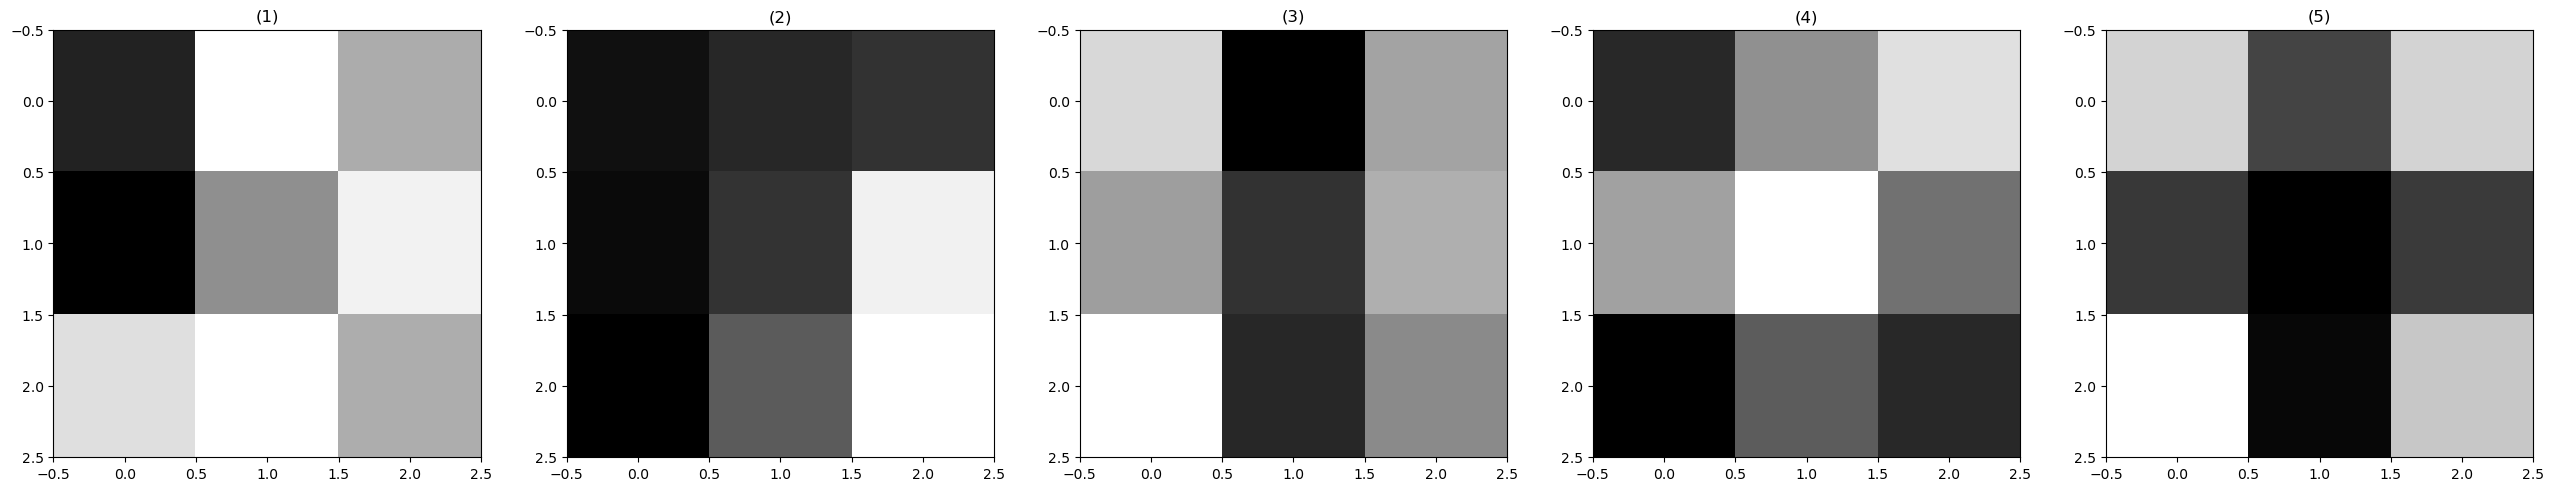

In [4]:
decryptedDOGImages = []
for octave in encryptedDOGImages:
    show_images(octave)
    decryptedOctave = []
    for image in octave:
        decryptedOctave.append(decryptImage(image))
    decryptedDOGImages.append(decryptedOctave)

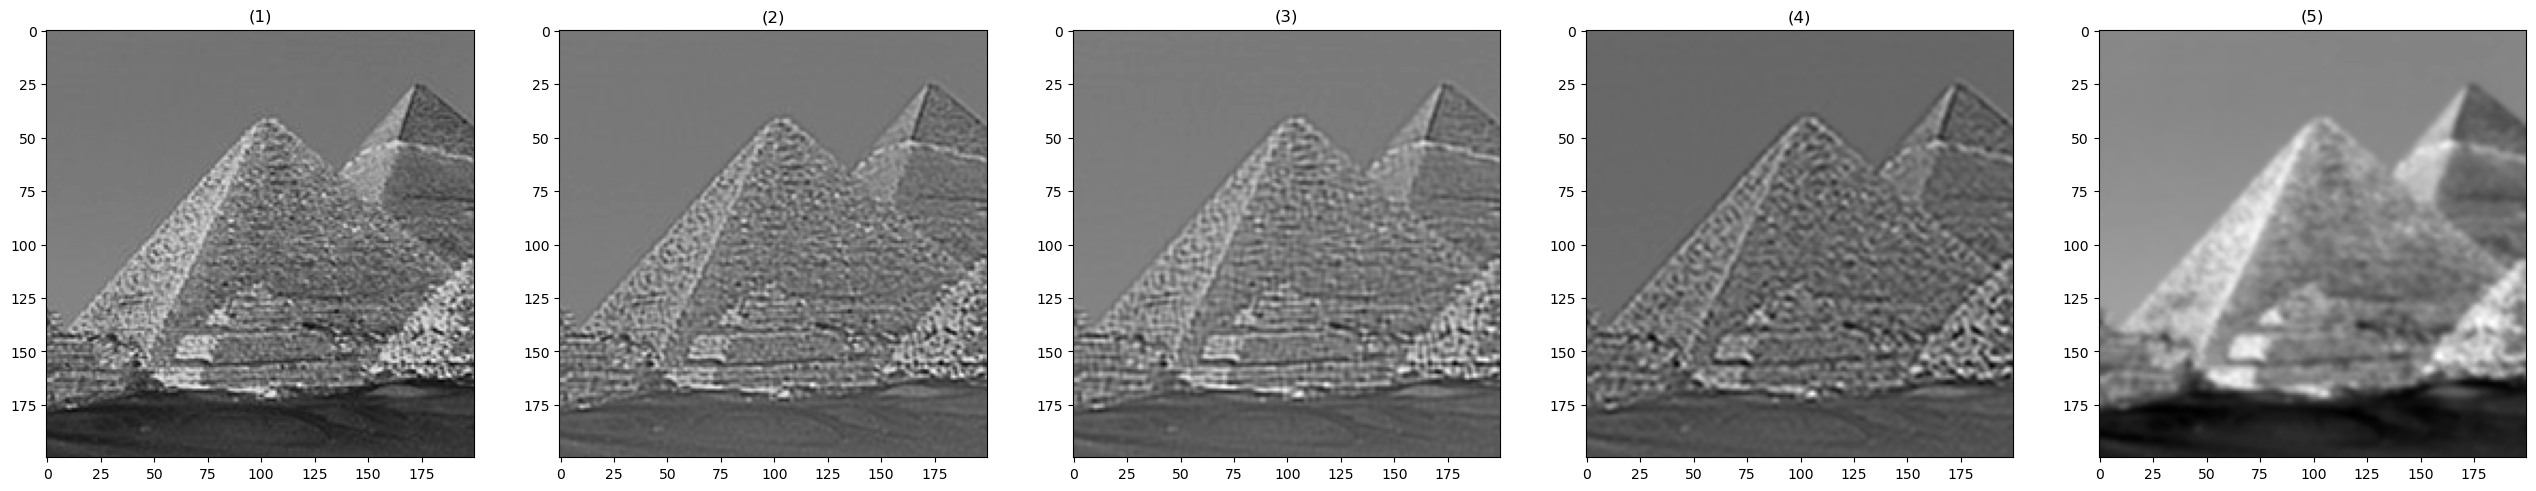

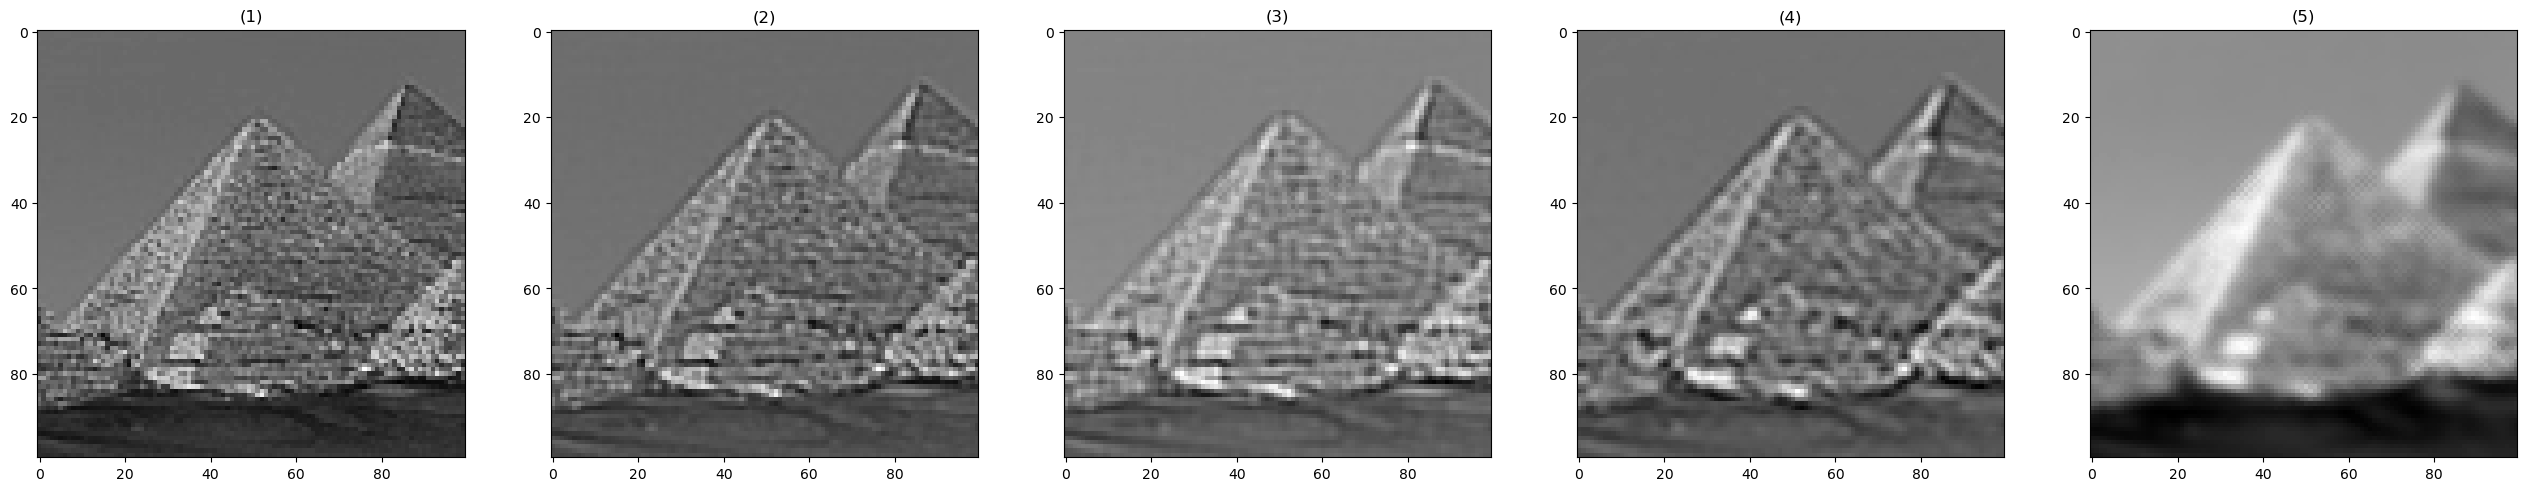

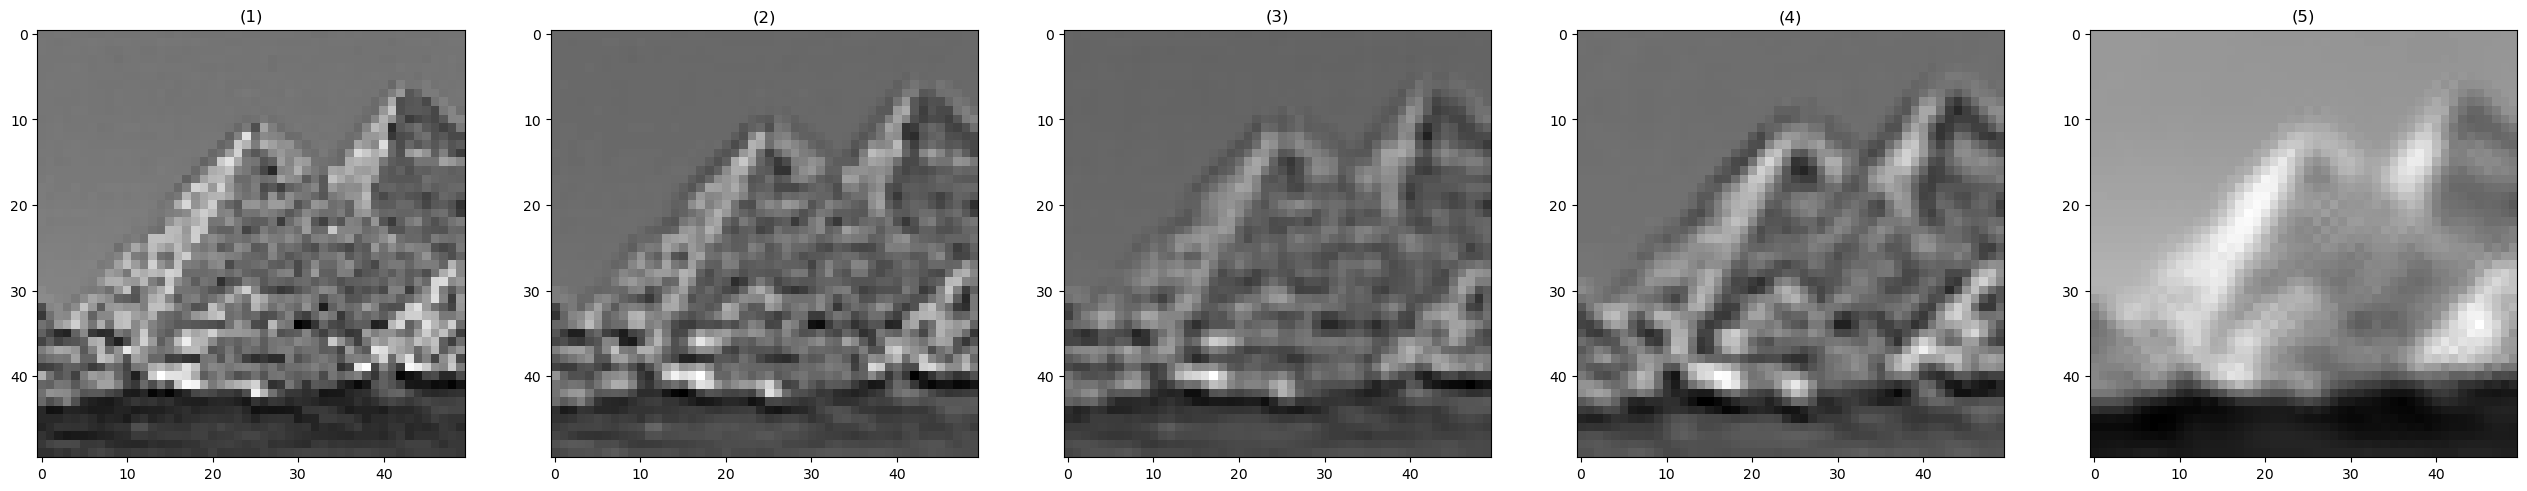

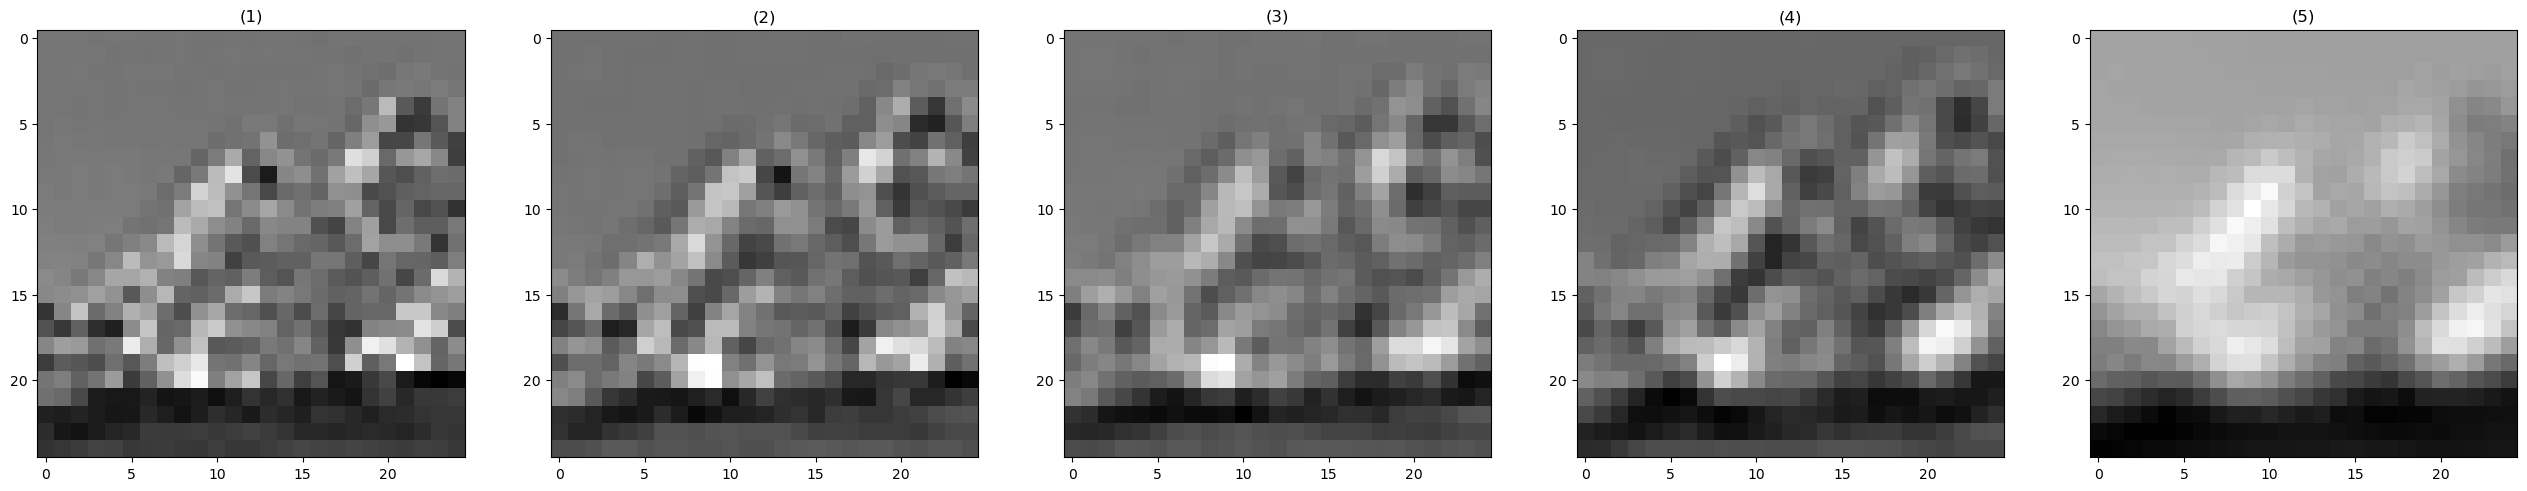

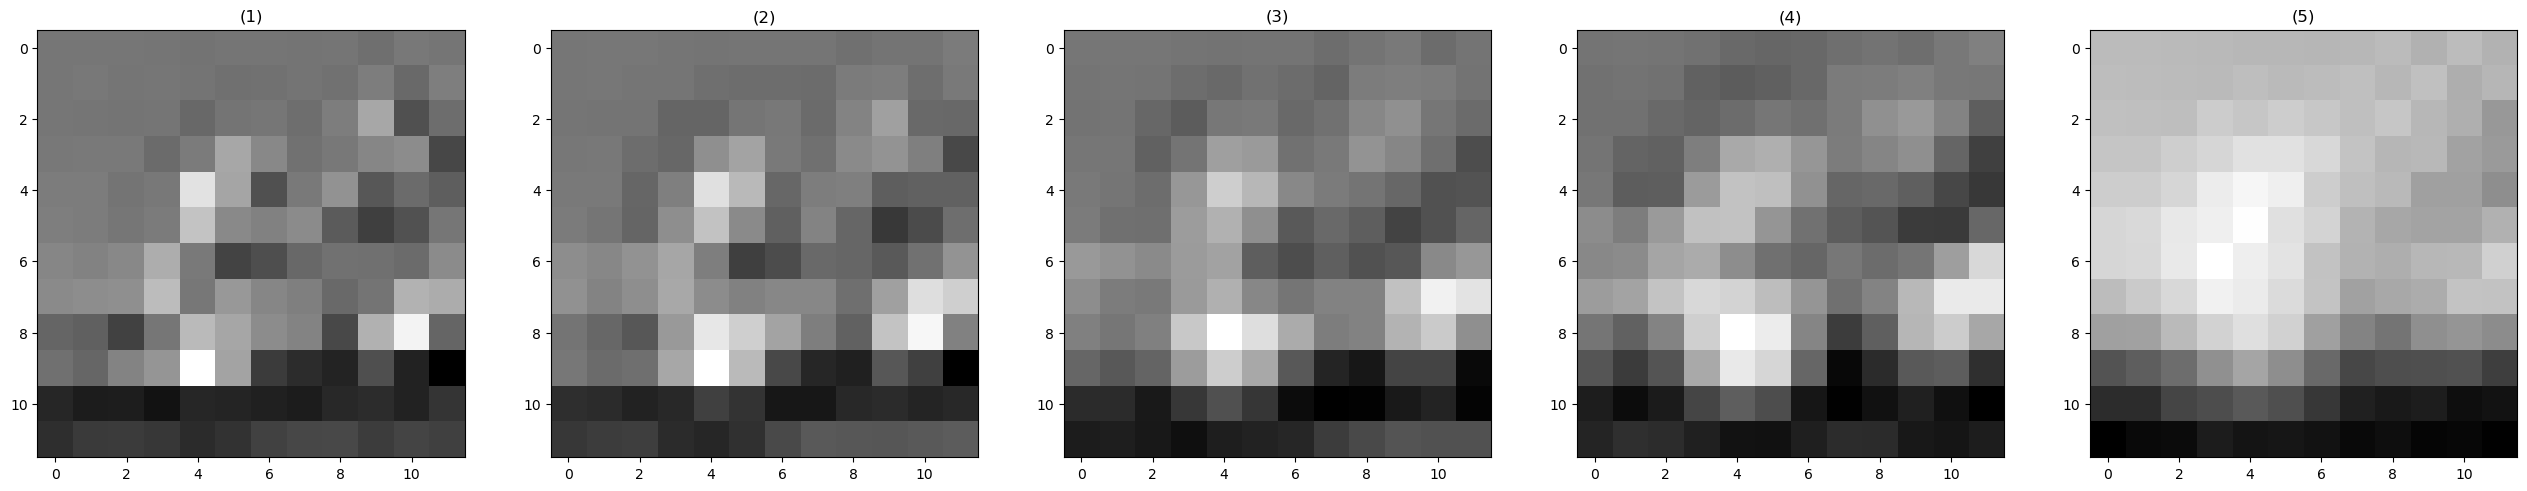

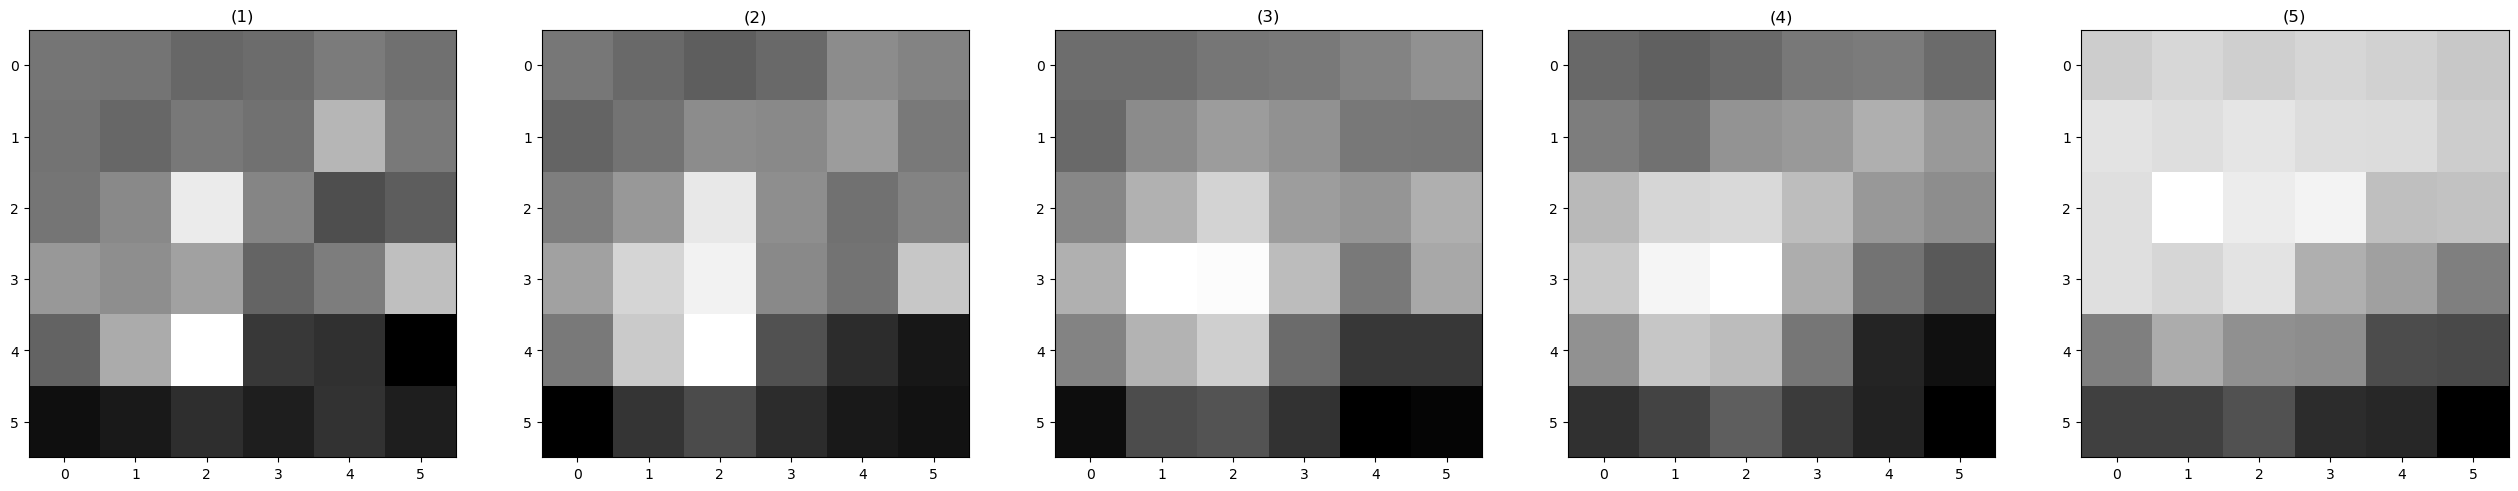

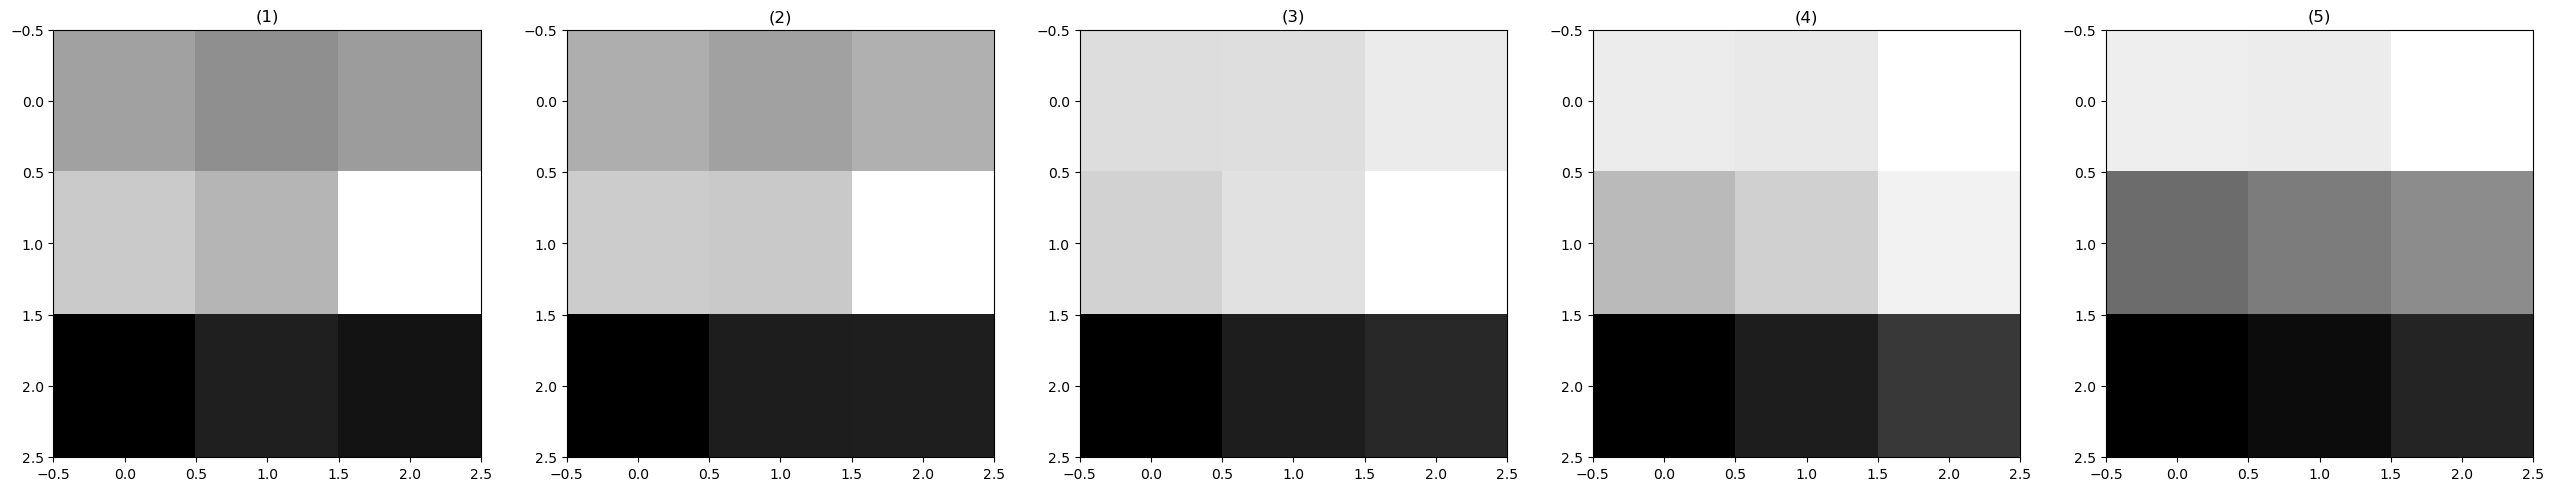

In [5]:
for octave in decryptedDOGImages:
    show_images(octave)